In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [139]:
df = pd.read_csv("C:\D_Drive\Academics\datasets\marketing_campaign.csv",sep="\t")
pd.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [140]:
df['Total']=df['MntFishProducts']+df['MntFruits']+df['MntGoldProds']+df['MntSweetProducts']+df['MntMeatProducts']+df['MntWines']

In [141]:
from datetime import datetime 
df['Age'] = df['Year_Birth'].apply(lambda x: datetime.now().year - x)

In [142]:
df["Age"].describe()

count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64

C:\Users\diyas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



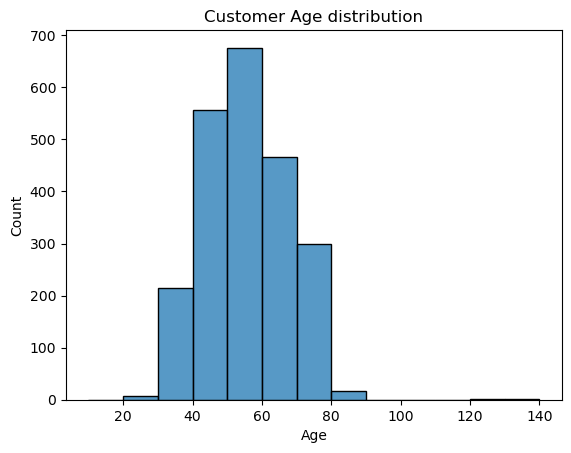

In [143]:
sns.histplot(data=df,x='Age',bins=list(range(10,150,10)))
plt.title('Customer Age distribution')
plt.show()

In [144]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [145]:
df['Education'] = df['Education'].replace({'Graduation':'Graduate',"PhD":"Postgraduate", "Master":"Postgraduate", "2n Cycle":"Postgraduate", "Basic":"Undergraduate"})

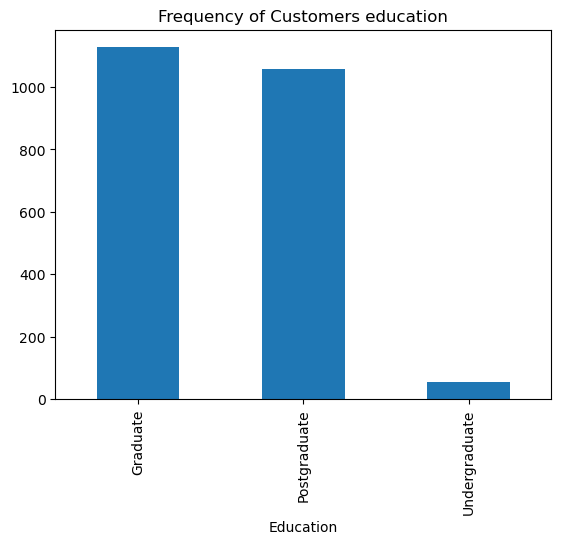

In [146]:
df['Education'].value_counts().plot.bar()
plt.title("Frequency of Customers education");

In [147]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

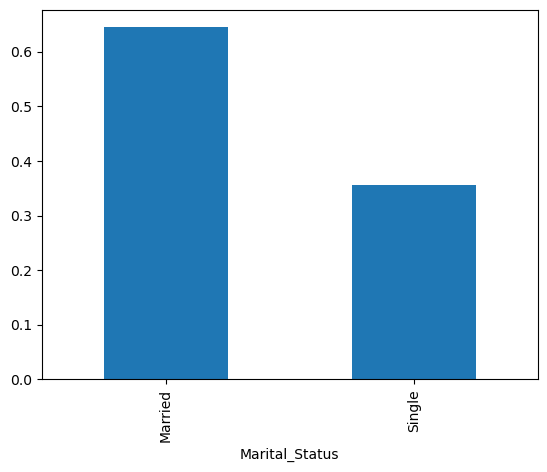

In [148]:
df['Marital_Status'] = df['Marital_Status'].replace({"Together":"Married", "Absurd":"Single", "Divorced":"Single", "Alone":"Single", "YOLO":"Single", "Widow":"Single"})
df['Marital_Status'].value_counts(normalize=True).plot.bar()
plt.show()

C:\Users\diyas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



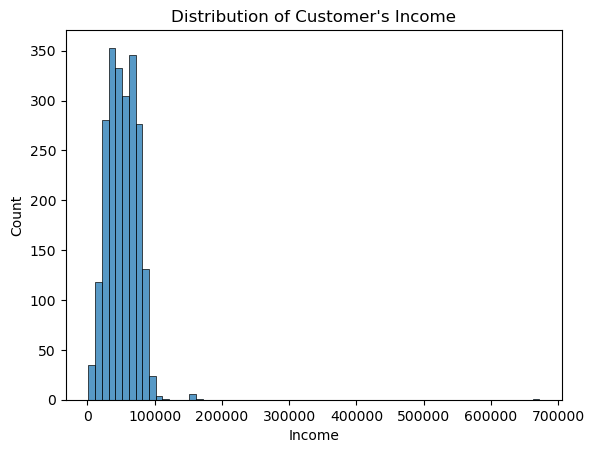

In [149]:
sns.histplot(data=df, x='Income', binwidth=1e4)
plt.title("Distribution of Customer's Income");

In [150]:
df['Kidhome'].unique()
df['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64


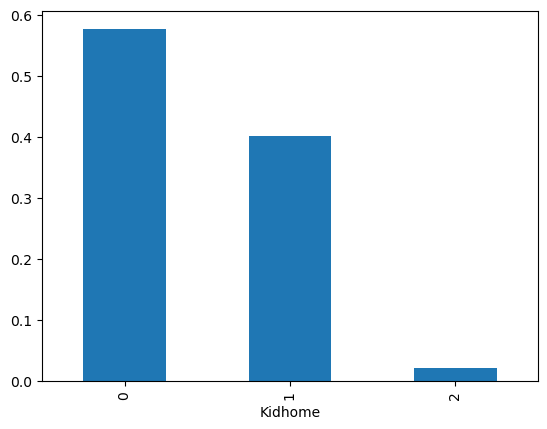

In [151]:
df['Kidhome'].value_counts(normalize=True).plot.bar()
print(df['Kidhome'].value_counts())

Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64


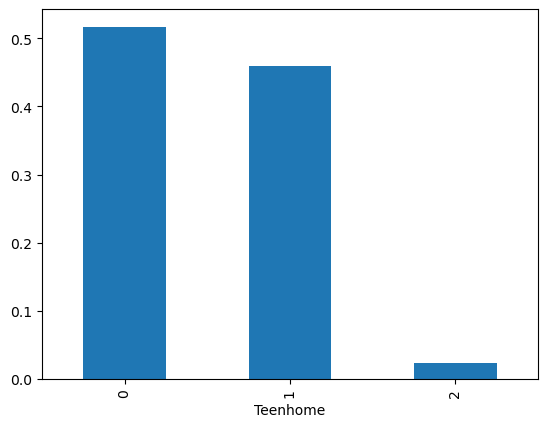

In [152]:
df['Teenhome'].value_counts(normalize=True).plot.bar()
print(df['Teenhome'].value_counts())

In [153]:
df['Total_children'] = df['Kidhome']+df['Teenhome']

In [154]:
df['Total_children'].unique()

array([0, 2, 1, 3], dtype=int64)

Total_children
1    1128
0     638
2     421
3      53
Name: count, dtype: int64


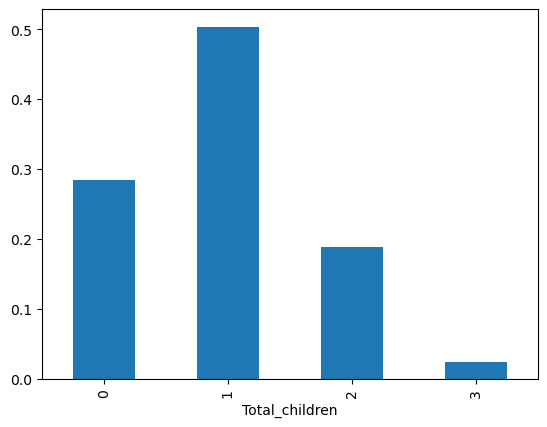

In [155]:
df['Total_children'].value_counts(normalize=True).sort_index().plot.bar()
print(df['Total_children'].value_counts())

In [156]:
df['Total'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Total, dtype: float64

C:\Users\diyas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



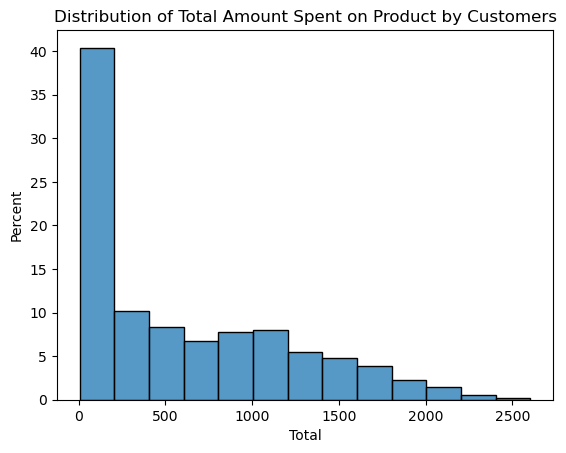

In [157]:
sns.histplot(data=df, x="Total", binwidth=200, stat="percent")
plt.title("Distribution of Total Amount Spent on Product by Customers");

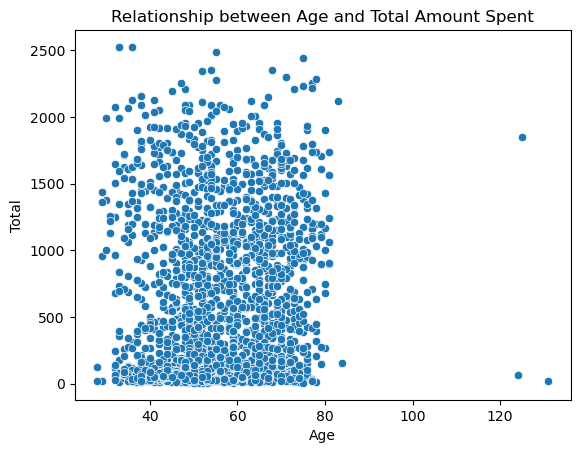

In [158]:
sns.scatterplot(data=df,x='Age',y='Total')
plt.title("Relationship between Age and Total Amount Spent");

In [159]:
def group_age(age):
    if age<20:
        return '11-20'
    elif age > 20 and age <31:
        return "21-30"
    elif age > 30 and age <41:
        return "31-40"
    elif age > 40 and age <51:
        return "41-50"
    elif age > 50 and age <61:
        return "51-60"
    elif age > 60 and age <71:
        return "61-70"
    elif age > 70 and age <81:
        return "71-80"
    elif age > 80:
        return ">80"

In [160]:
df['Age group'] = df['Age'].apply(group_age)
order = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80", ">80"]

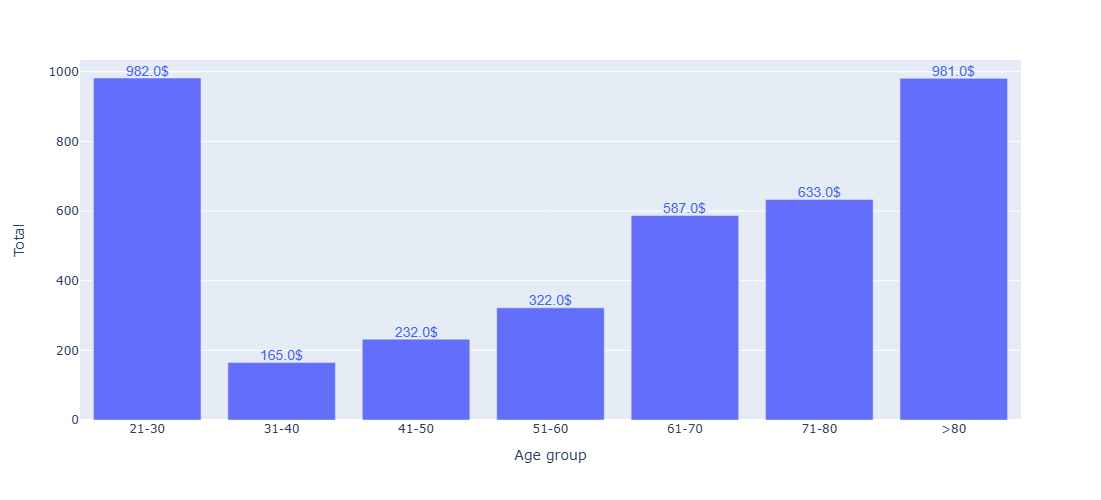

In [161]:
mask = df.groupby("Age group")["Total"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Age group", y="Total", height=500)

annotation = []
for x, y in zip(mask["Age group"], mask["Total"]):
    annotation.append(
        dict(x=x, y=y +20,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)
fig.show()

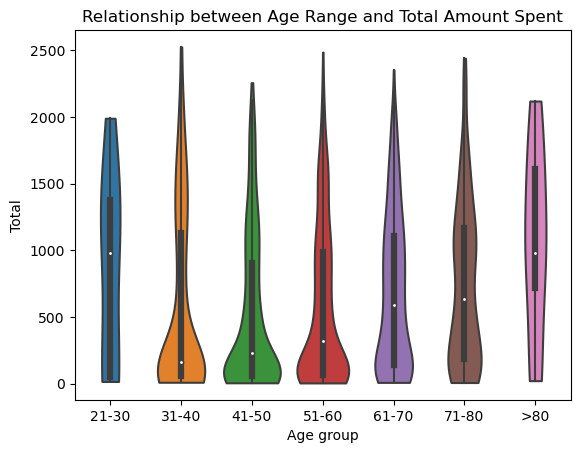

In [162]:
plt.figure()
sns.violinplot(x="Age group", y="Total", data=df, cut=0, order=order)
plt.title("Relationship between Age Range and Total Amount Spent");

In [163]:
age_group_spending = df.groupby('Age group').agg({
    'MntWines': 'mean',
    'MntFruits': 'mean',
    'MntMeatProducts': 'mean',
    'MntFishProducts': 'mean',
    'MntSweetProducts': 'mean',
    'MntGoldProds': 'mean'
}).reindex(order).reset_index()

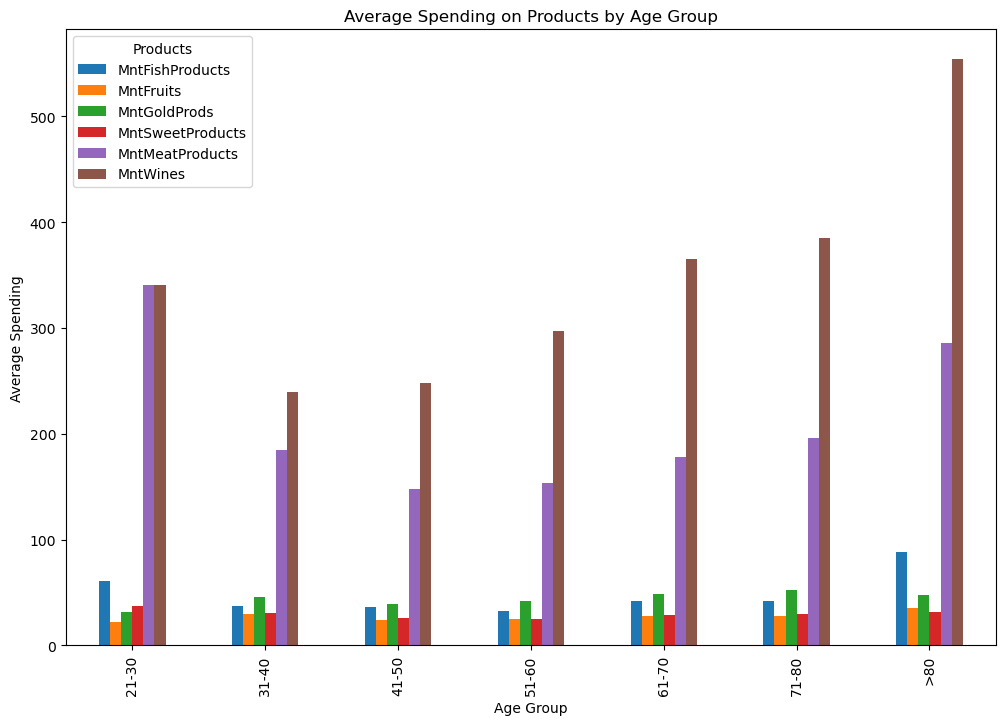

In [164]:
'''df.plot(x="Age group", y=['MntFishProducts','MntFruits','MntGoldProds','MntSweetProducts','MntMeatProducts','MntWines'],
        kind="bar", figsize=(10, 10))
 
# Display plot
plt.show()'''
age_group_spending.plot(x="Age group", y=['MntFishProducts','MntFruits','MntGoldProds','MntSweetProducts','MntMeatProducts','MntWines'],
                        kind="bar", figsize=(12, 8))

plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.title('Average Spending on Products by Age Group')
plt.legend(title='Products')
plt.show()

In [165]:
from scipy.stats import iqr
iqr = iqr(df["Income"], nan_policy="omit")

low = np.nanquantile(df["Income"], 0.25) - 1.5 * iqr
high = np.nanquantile(df["Income"], 0.75) + 1.5 * iqr
df_cut = df[df["Income"].between(low, high)]

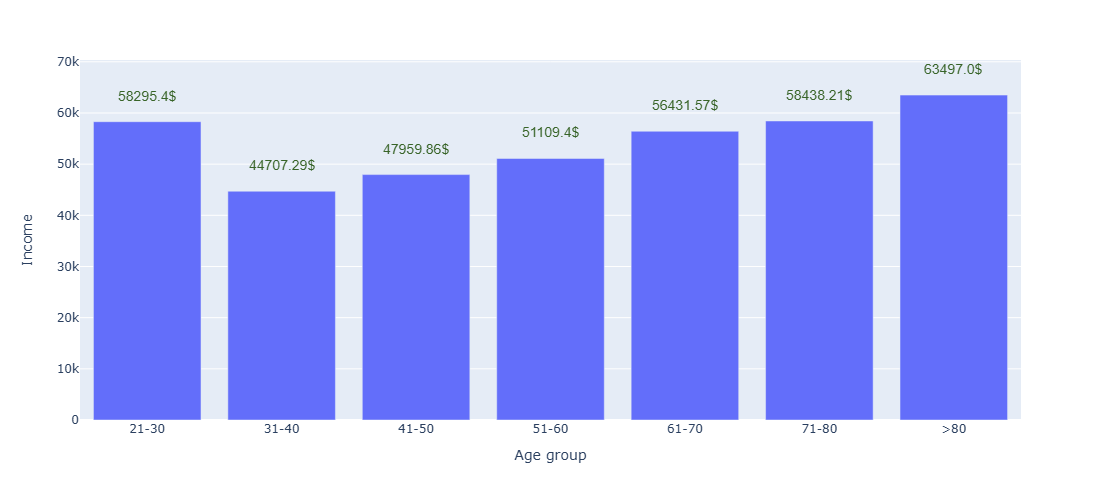

In [166]:
mask = df_cut.groupby("Age group")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Age group", y="Income", height=500)

annotation = []
for x, y in zip(mask["Age group"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(56, 100, 40)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()


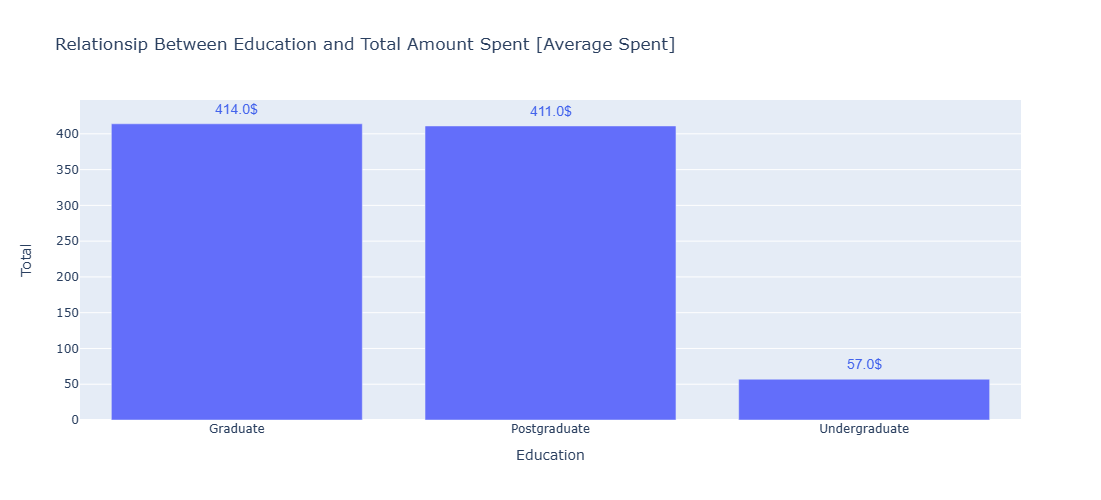

In [167]:
mask = df.groupby("Education")["Total"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Education", y="Total", height=500,
            title = "Relationsip Between Education and Total Amount Spent [Average Spent]")

annotation = []
for x, y in zip(mask["Education"], mask["Total"]):
    annotation.append(
        dict(x=x, y=y +20,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)
fig.show()

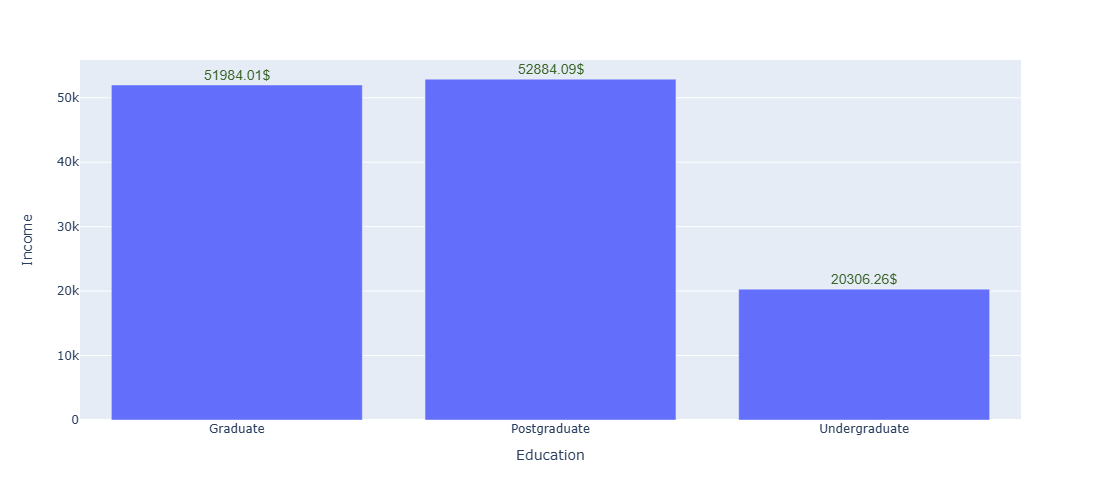

In [168]:
mask = df_cut.groupby("Education")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Education", y="Income", height=500)

annotation = []
for x, y in zip(mask["Education"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +1500,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(56, 100, 40)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

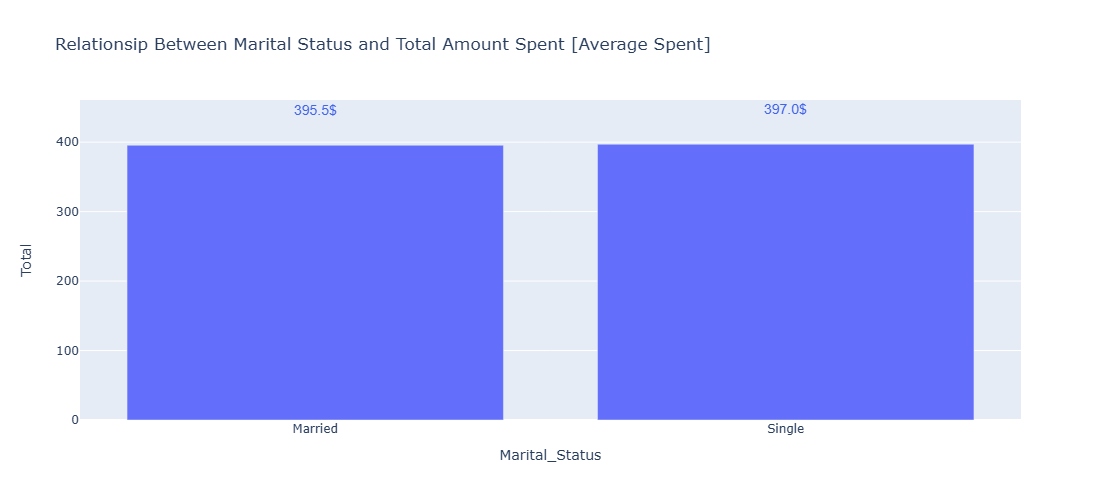

In [169]:
mask = df.groupby("Marital_Status")["Total"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Marital_Status", y="Total", height=500,
            title = "Relationsip Between Marital Status and Total Amount Spent [Average Spent]")

annotation = []
for x, y in zip(mask["Marital_Status"], mask["Total"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)
fig.show()

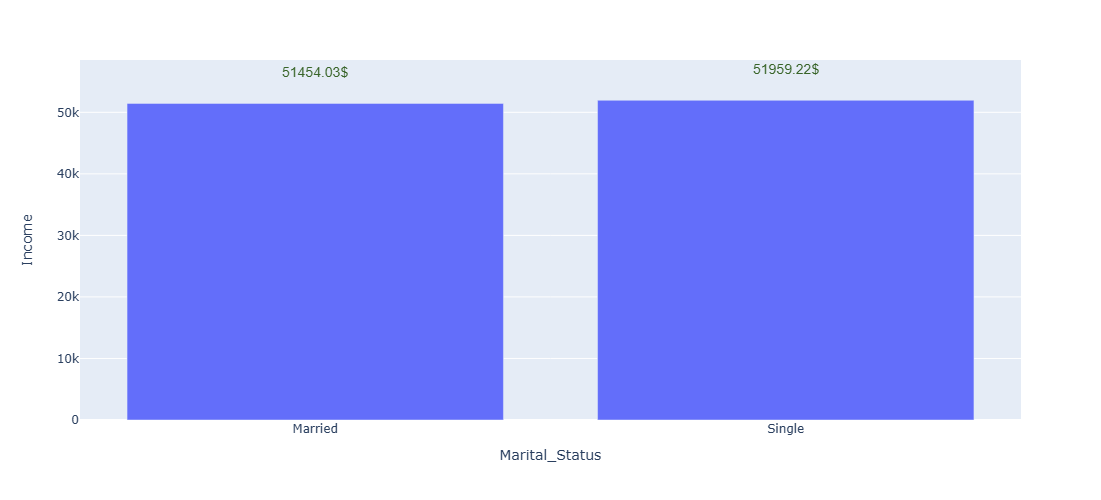

In [170]:
mask = df_cut.groupby("Marital_Status")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Marital_Status", y="Income", height=500)

annotation = []
for x, y in zip(mask["Marital_Status"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(56, 100, 40)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

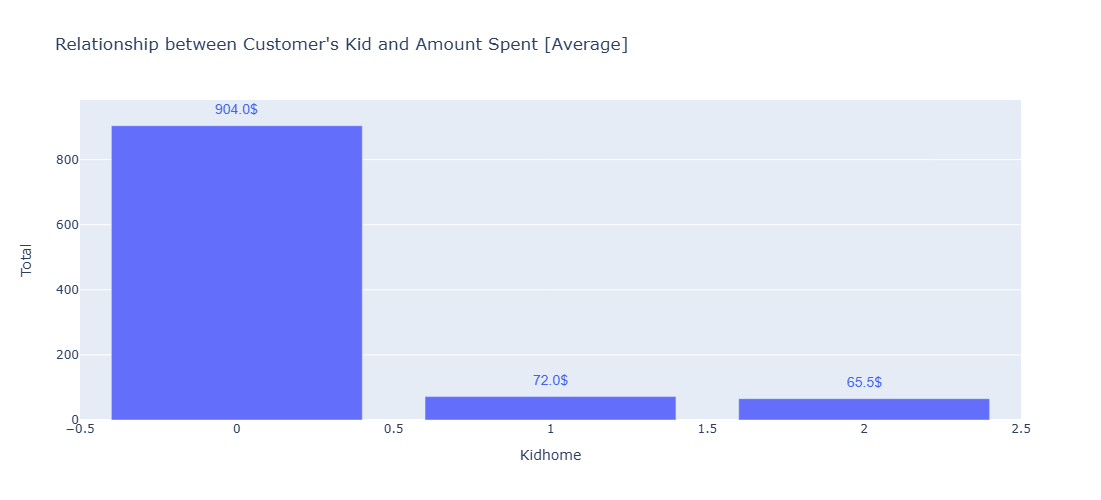

In [171]:
mask = df.groupby("Kidhome")["Total"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Kidhome", y="Total", height=500, 
             title="Relationship between Customer's Kid and Amount Spent [Average]")

annotation = []
for x, y in zip(mask["Kidhome"], mask["Total"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

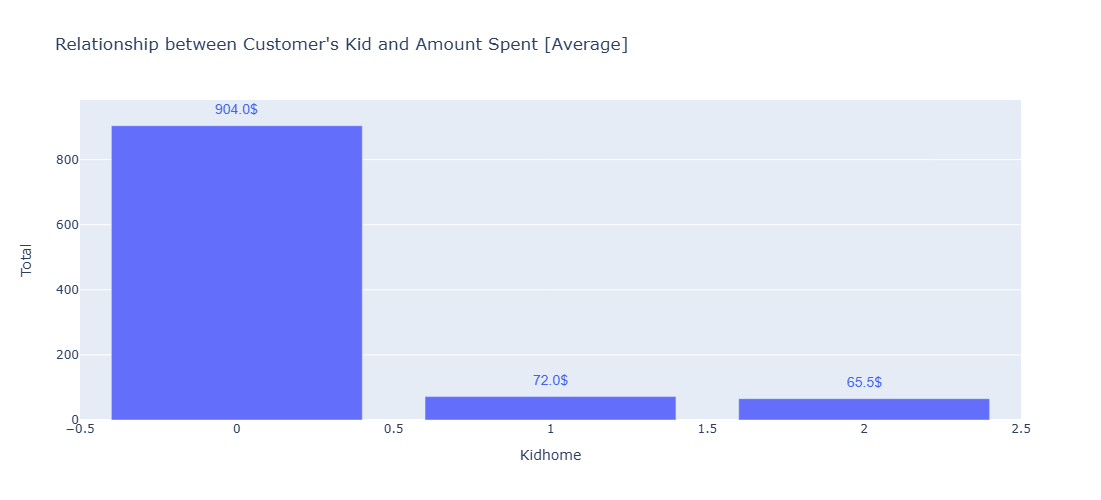

In [172]:
mask = df.groupby("Kidhome")["Total"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Kidhome", y="Total", height=500, 
             title="Relationship between Customer's Kid and Amount Spent [Average]")

annotation = []
for x, y in zip(mask["Kidhome"], mask["Total"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

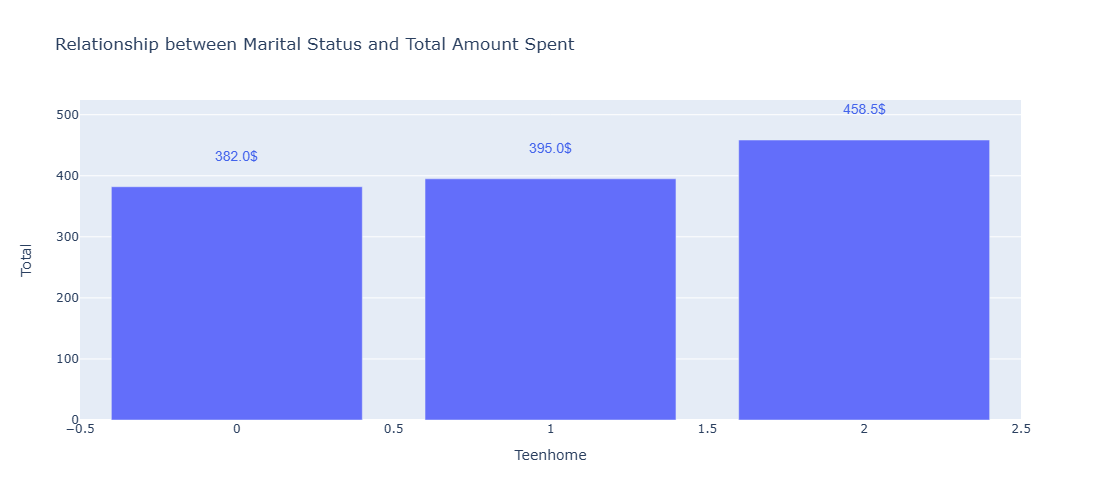

In [173]:
mask = df.groupby("Teenhome")["Total"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Teenhome", y="Total", height=500, title="Relationship between Marital Status and Total Amount Spent")

annotation = []
for x, y in zip(mask["Teenhome"], mask["Total"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_layout(annotations=annotation)
fig.show()

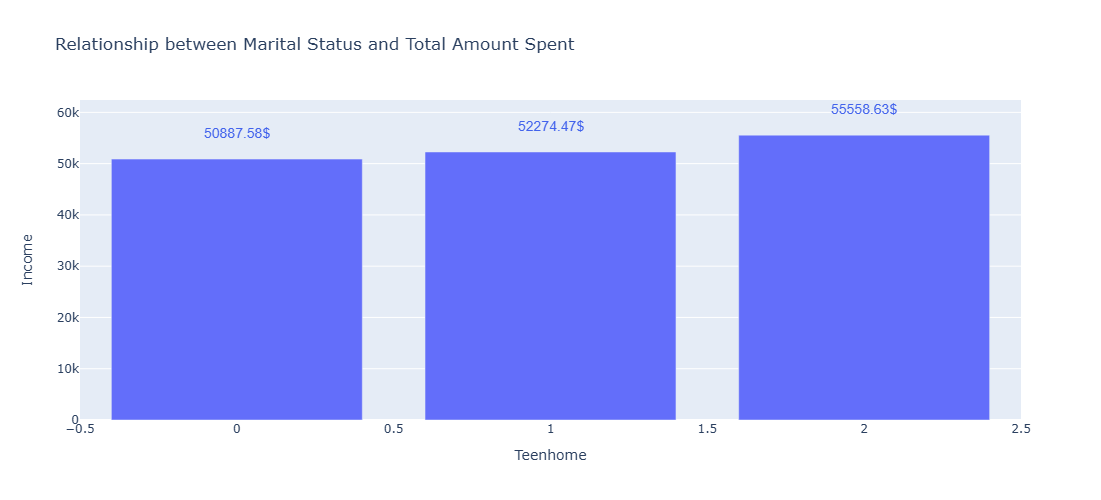

In [174]:
mask = df_cut.groupby("Teenhome")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Teenhome", y="Income", height=500, title="Relationship between Marital Status and Total Amount Spent")

annotation = []
for x, y in zip(mask["Teenhome"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_layout(annotations=annotation)
fig.show()

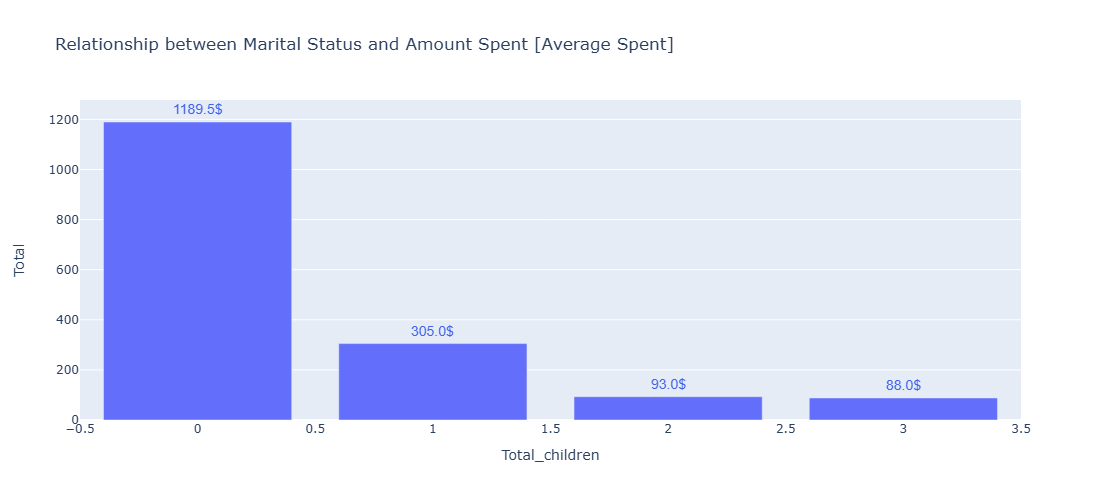

In [175]:
mask = df.groupby("Total_children")["Total"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Total_children", y="Total", height=500,
             title="Relationship between Marital Status and Amount Spent [Average Spent]")

annotation = []
for x, y in zip(mask["Total_children"], mask["Total"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_layout(annotations=annotation)
fig.show()

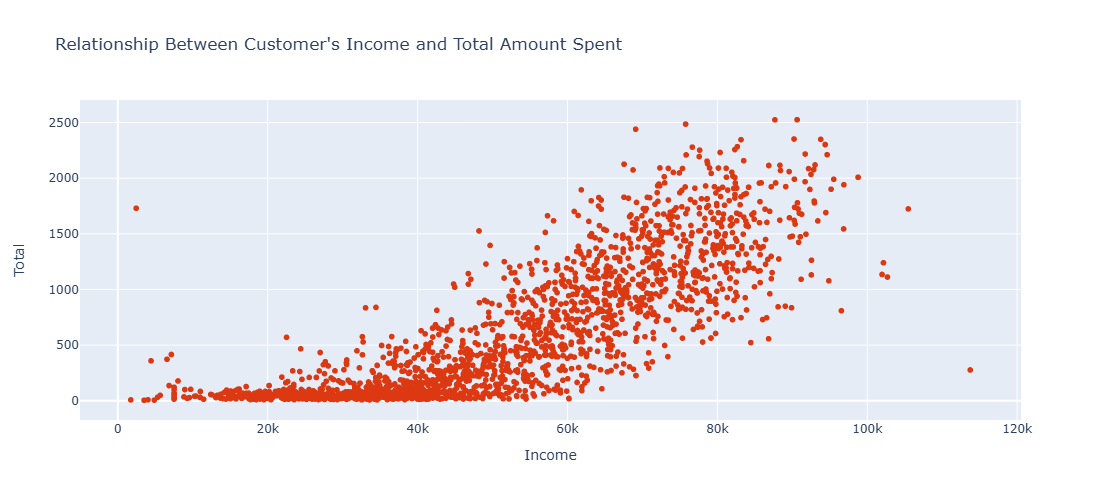

In [176]:
fig = px.scatter(data_frame=df_cut, x="Income",
                 y="Total", title="Relationship Between Customer's Income and Total Amount Spent",
                height=500,
                color_discrete_sequence = px.colors.qualitative.G10[1:])
fig.show()

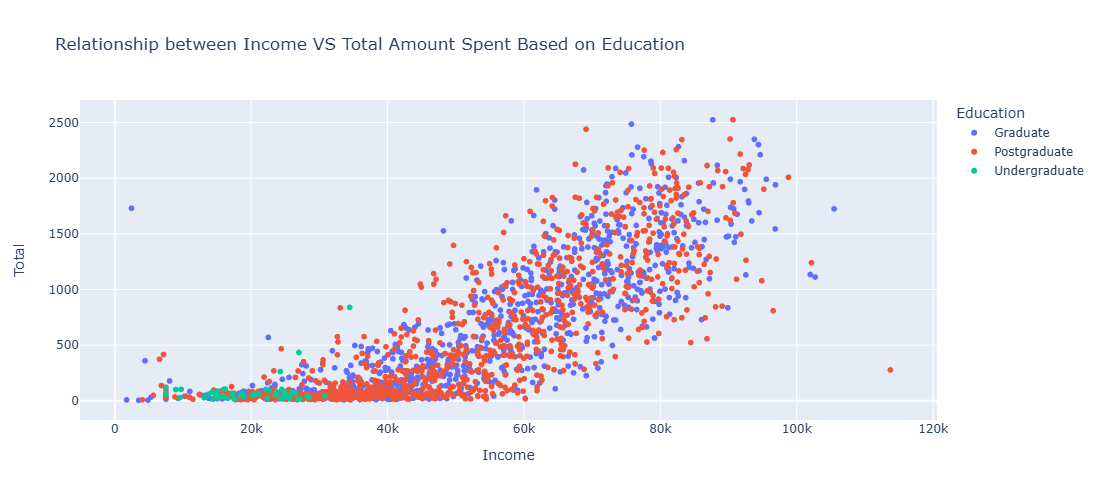

In [177]:
fig = px.scatter(
    data_frame=df_cut,
    x = "Income",
    y= "Total",
    title = "Relationship between Income VS Total Amount Spent Based on Education",
    color = "Education",
    height=500
)
fig.show()

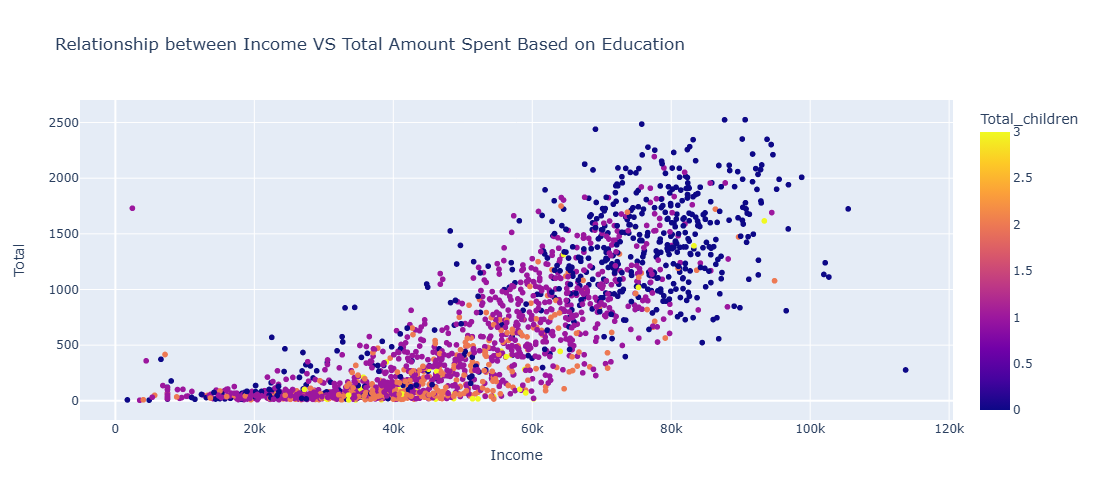

In [178]:
fig = px.scatter(
    data_frame=df_cut,
    x = "Income",
    y= "Total",
    title = "Relationship between Income VS Total Amount Spent Based on Education",
    color = "Total_children",
    height=500
)
fig.show()


In [179]:
df["Income"].fillna(df["Income"].median(), inplace=True)

In [180]:
data = df[["Income", "Total"]]

In [181]:
df_log = np.log(data)

In [182]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

C:\Users\diyas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\diyas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.

C:\Users\diyas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\diyas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.

C:\Users\diy

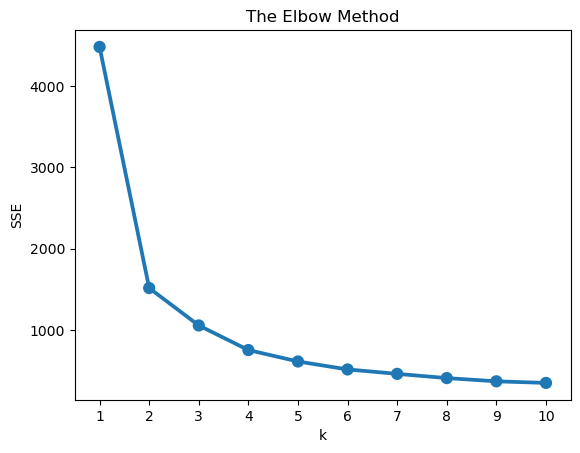

In [183]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.savefig("Elbow.png")

In [184]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [185]:
from kneed import KneeLocator
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 3


In [186]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_scaled)

C:\Users\diyas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\diyas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.



KMeans(n_clusters=3, random_state=42)

In [187]:
data = data.assign(ClusterLabel= model.labels_)
data.groupby("ClusterLabel")[["Income", "Total"]].median()

,Income,Total
ClusterLabel,,
0,25261.5,43.0
1,69084.0,1069.5
2,42641.0,145.0


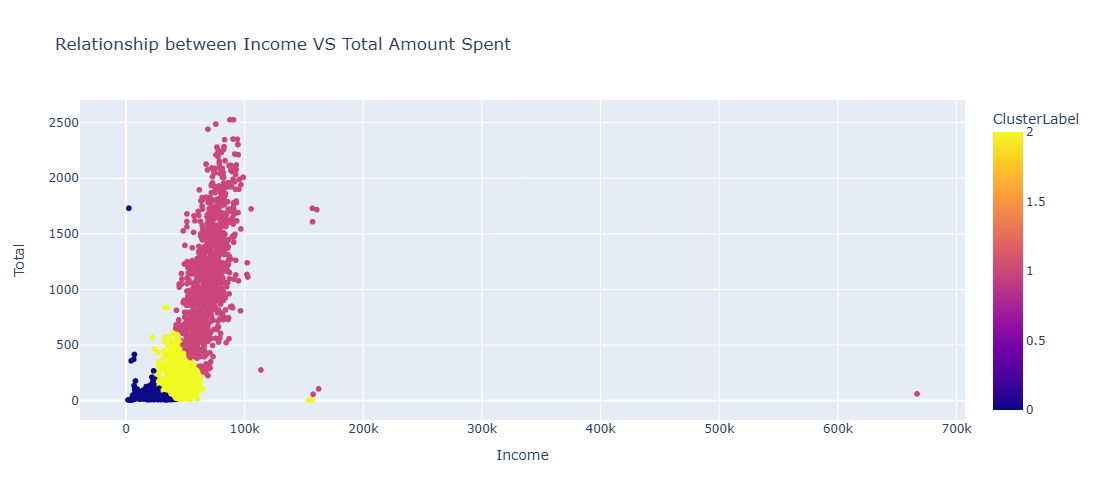

In [188]:
fig = px.scatter(
    data_frame=data,
    x = "Income",
    y= "Total",
    title = "Relationship between Income VS Total Amount Spent",
    color = "ClusterLabel",
    height=500
)
fig.show()

In [189]:
data = df[["Age", "Income", "Total"]]
df_log = np.log(data)
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

C:\Users\diyas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\diyas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.

C:\Users\diyas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\diyas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.

C:\Users\diy

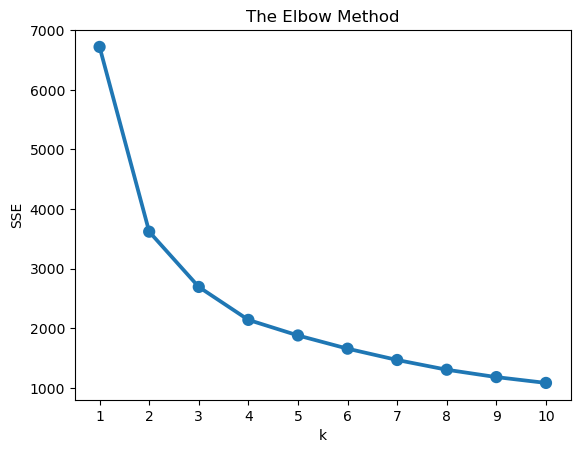

In [190]:
sse = {}
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    sse[k] = model.inertia_
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [191]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_scaled)


data = data.assign(ClusterLabel= model.labels_)
result = data.groupby("ClusterLabel").agg({"Age":"mean", "Income":"median", "Total":"median"}).round()
result

C:\Users\diyas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\diyas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.



,Age,Income,Total
ClusterLabel,,,
0,51.0,31801.0,54.0
1,46.0,67402.0,1001.0
2,67.0,62814.0,822.0


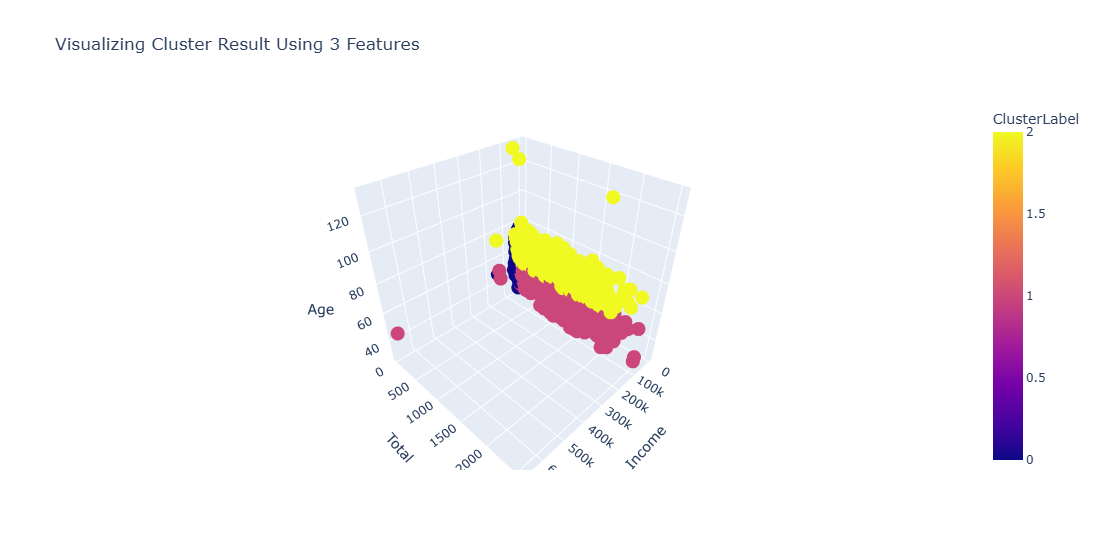

In [192]:
fig = px.scatter_3d(data_frame=data, x="Income", 
                    y="Total", z="Age", color="ClusterLabel", height=550,
                   title = "Visualizing Cluster Result Using 3 Features")
fig.show()

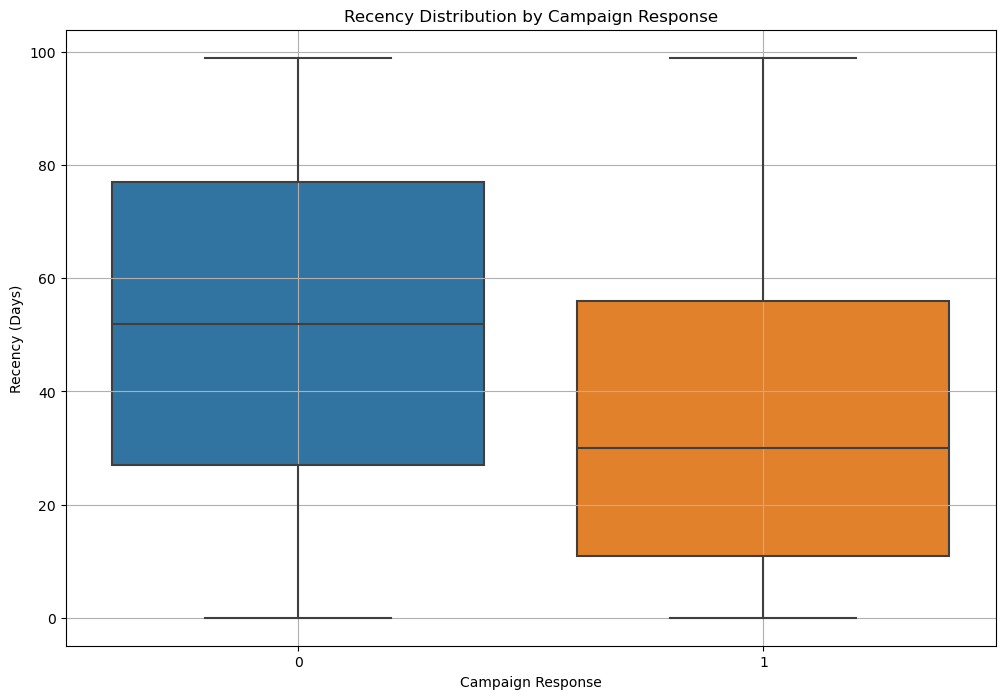

In [193]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Response', y='Recency')
plt.title('Recency Distribution by Campaign Response')
plt.xlabel('Campaign Response')
plt.ylabel('Recency (Days)')
plt.grid(True)
plt.show()

In [194]:
correlation_matrix = df[['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Response']].corr()
print(correlation_matrix)

                   Recency  MntWines  MntFruits  MntMeatProducts  \
Recency           1.000000  0.016064  -0.004306         0.023056   
MntWines          0.016064  1.000000   0.389637         0.562667   
MntFruits        -0.004306  0.389637   1.000000         0.543105   
MntMeatProducts   0.023056  0.562667   0.543105         1.000000   
MntFishProducts   0.001079  0.399753   0.594804         0.568402   
MntSweetProducts  0.022670  0.386581   0.567164         0.523846   
MntGoldProds      0.016693  0.387516   0.392995         0.350609   
Response         -0.198437  0.247254   0.125289         0.236335   

                  MntFishProducts  MntSweetProducts  MntGoldProds  Response  
Recency                  0.001079          0.022670      0.016693 -0.198437  
MntWines                 0.399753          0.386581      0.387516  0.247254  
MntFruits                0.594804          0.567164      0.392995  0.125289  
MntMeatProducts          0.568402          0.523846      0.350609  0.236335

In [195]:
import statsmodels.api as sm

X = df[['Recency']]
X = sm.add_constant(X) 
y = df['Response']

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.400908
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2238
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                 0.04808
Time:                        16:47:22   Log-Likelihood:                -898.03
converged:                       True   LL-Null:                       -943.39
Covariance Type:            nonrobust   LLR p-value:                 1.658e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8603      0.104     -8.295      0.000      -1.064      -0.657
Recency       -0.0204      0.

In [196]:
#Recency has a statistically significant negative effect on the likelihood of responding to the campaign.

In [197]:
odds_ratio_recency = np.exp(-0.0204)
print("Odds Ratio for Recency:", odds_ratio_recency)


Odds Ratio for Recency: 0.9798066722428721


In [198]:
'''This suggests that if a customer’s last purchase was a long time ago, they are less likely to respond to the current campaign.
Therefore, campaigns might be more effective if targeted at customers who have made a purchase more recently. 
Focus on customers who have purchased more recently for better campaign effectiveness.'''

'This suggests that if a customer’s last purchase was a long time ago, they are less likely to respond to the current campaign.\nTherefore, campaigns might be more effective if targeted at customers who have made a purchase more recently. \nFocus on customers who have purchased more recently for better campaign effectiveness.'

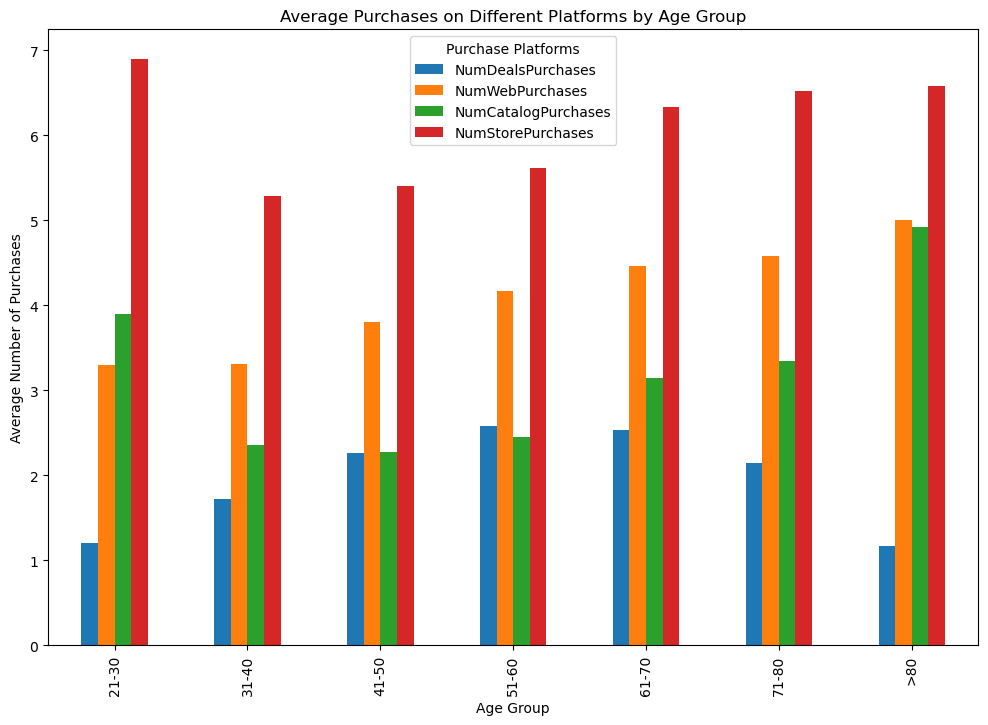

In [200]:
import matplotlib.pyplot as plt

# Plotting the average purchases by age group for different platforms
age_group_platforms = df.groupby('Age group').agg({
    "NumDealsPurchases": 'mean',
    "NumWebPurchases": 'mean',
    "NumCatalogPurchases": 'mean',
    "NumStorePurchases": 'mean',
}).reindex(order).reset_index()

# Plotting
age_group_platforms.set_index("Age group").plot(kind="bar", figsize=(12, 8))

plt.xlabel("Age Group")
plt.ylabel('Average Number of Purchases')
plt.title('Average Purchases on Different Platforms by Age Group')
plt.legend(title='Purchase Platforms')
plt.show()
